# In Drive Coupon Recommendation
---

## Problem Statement
---

This data was collected via a survey on the Ecom website Mechanical Turk. The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and then asks the user whether he/she will accept the coupon or not. In this project we have to predict if the user will accept the coupon.


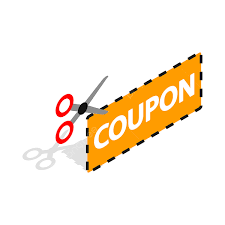

## Data Dictionary

1. Gender: Female, Male
2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4. has_Children: 1: has children, 0: No children
5. Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6. Occupation: Traveller’s occupation 
7. Income: income of the traveler
8. Car: Description of vehicle driven by the traveller
9. Bar: how many times does the traveler go to a bar every month? 
10. Coffee House: how many times does the user go to a coffeehouse every month?
11. Carry Away: how many times does the user get takeaway food every month?
12. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than \$20 every month?
13. Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of \$20 — \$50 every month
14. Destination: destination of traveler
15. Passenger: who are the passengers in the car 
16. Weather: weather when the user is driving (Sunny, Rainy, Snowy)
17. Temperature: temperature in Fahrenheit when the user is driving 
18. Coupon: Type of Cupon
19. Expiration: Validity of Cupon
20. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
21. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
22. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
23. direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
24. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
25. Accept(Y/N?)- Target column( whether user will accept the coupon or not?)

## Importing Libraries

In [1]:
import os
cwd = os.getcwd()
import warnings
warnings.filterwarnings("ignore")
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

## Load the Data Set

In [2]:
# loading the dataset
data = pd.read_csv(cwd + "\\Data.csv")

In [3]:
# Creating copy of data set to avoid reloading of data
df = data.copy()

In [4]:
# Displaying first 5 rows
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Renaming the columns for better readability

In [5]:
def rename_column(old_name, new_name, data):
    """
    Renames column in dataset.

    Args:
      old_name (str): current name of column.
      new_name (str): new name of column.
      data (pandas.DataFrame): dataset in which renaming is to be performed.

    Returns:
      pandas.DataFrame: data after renaming the column.
      
    """
    data[new_name] = data[old_name] #creating a copy of old column with new name
    data.drop(old_name, inplace=True, axis=1) # dropping the old column
    return data

In [6]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [7]:
rename_column("passanger", "passenger", df)
rename_column("maritalStatus", "marital_status", df)
rename_column("Bar", "bar", df)
rename_column("CoffeeHouse", "coffee_house", df)
rename_column("CarryAway", "carry_away", df)
rename_column("RestaurantLessThan20", "restaurant_less_than_20", df)
rename_column("Restaurant20To50", "restaurant_20_to_50", df)
rename_column("toCoupon_GEQ5min", "to_coupon_GEQ_5min", df)
rename_column("toCoupon_GEQ15min", "to_coupon_GEQ_15min", df)
rename_column("toCoupon_GEQ25min", "to_coupon_GEQ_25min", df)
rename_column("Accept(Y/N?)", "accepted", df)

,destination,weather,temperature,coupon,expiration,gender,age,has_children,education,occupation,income,car,direction_same,direction_opp,passenger,marital_status,bar,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,to_coupon_GEQ_5min,to_coupon_GEQ_15min,to_coupon_GEQ_25min,accepted
0,No Urgent Place,Sunny,55,Restaurant(<20),1d,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Alone,Unmarried partner,never,never,NaN,4~8,1~3,1,0,0,1
1,No Urgent Place,Sunny,80,Coffee House,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,0,0,0
2,No Urgent Place,Sunny,80,Carry out & Take away,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,1
3,No Urgent Place,Sunny,80,Coffee House,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,0
4,No Urgent Place,Sunny,80,Coffee House,1d,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Rainy,55,Carry out & Take away,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,1,0,Partner,Single,never,never,1~3,4~8,1~3,1,0,0,1
12680,Work,Rainy,55,Carry out & Take away,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,0,1,Alone,Single,never,never,1~3,4~8,1~3,1,0,0,1
12681,Work,Snowy,30,Coffee House,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,1,0,Alone,Single,never,never,1~3,4~8,1~3,1,0,0,0
12682,Work,Snowy,30,Bar,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,0,1,Alone,Single,never,never,1~3,4~8,1~3,1,1,1,0


In [8]:
# shape of dataset
df.shape

(12684, 25)

In [9]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   destination              12684 non-null  object
 1   weather                  12684 non-null  object
 2   temperature              12684 non-null  int64 
 3   coupon                   12684 non-null  object
 4   expiration               12684 non-null  object
 5   gender                   12684 non-null  object
 6   age                      12684 non-null  object
 7   has_children             12684 non-null  int64 
 8   education                12684 non-null  object
 9   occupation               12684 non-null  object
 10  income                   12684 non-null  object
 11  car                      108 non-null    object
 12  direction_same           12684 non-null  int64 
 13  direction_opp            12684 non-null  int64 
 14  passenger                12684 non-nul

#### We have missing values in car, bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50. <br> We have to handle the missing values in these features
----

In [10]:
# Describing the data
df.describe()

,temperature,has_children,direction_same,direction_opp,to_coupon_GEQ_5min,to_coupon_GEQ_15min,to_coupon_GEQ_25min,accepted
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,0.214759,0.785241,1.0,0.561495,0.119126,0.568433
std,19.154486,0.492593,0.410671,0.410671,0.0,0.496224,0.323950,0.495314
min,30.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000
75%,80.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


## Exploratory Data Analysing & Data Preprocessing

### Target Variable
#### accepted is our target variable which contains 1 or 0 for Yes or No. Whether the user has accepted the coupon or not.

In [11]:
df['accepted'].value_counts()

accepted
1    7210
0    5474
Name: count, dtype: int64

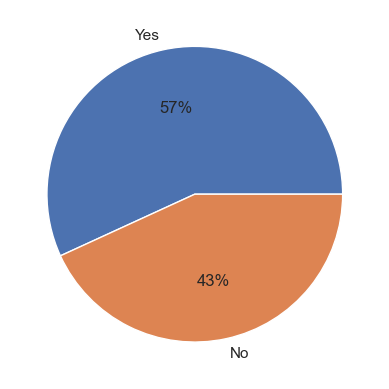

In [12]:
# plotting data on chart
plt.pie(df['accepted'].value_counts(), labels=['Yes','No'], autopct='%.0f%%')
  
# displaying chart
plt.show()

#### We have 7210 "yes" and 5474 "no" i.e 57%and 43% so the data is fairly balanced. <br>And since the data is fairly balanced we can go for accuracy as our evaluation metric.
----

## Car Column

In [13]:
# Checking values in Car feature
print(df['car'].value_counts())

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


In [14]:
# Checking percentage of null values in Car feature
print(f"Car has {round((df['car'].isnull().sum() / len(df['car'])*100),2)} % null values")

Car has 99.15 % null values


### car has more than 99% missing values. We should drop this column

In [15]:
df.drop('car', inplace=True, axis=1)

## Age Column

In [16]:
# Checking values in Age feature
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [17]:
# Converting 50plus as 51 and below 21 as 20.
df['age'] = np.where(df['age'] == '50plus', '51', df['age'])
df['age'] = np.where(df['age'] == 'below21', '20', df['age'])

# Converting age column as int
df['age'] = df['age'].astype("int64")

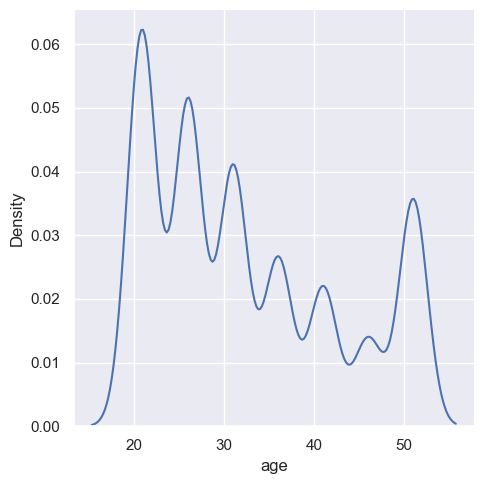

In [18]:
# Checking distribution of age feature
sns.displot(x=df['age'], kind="kde");

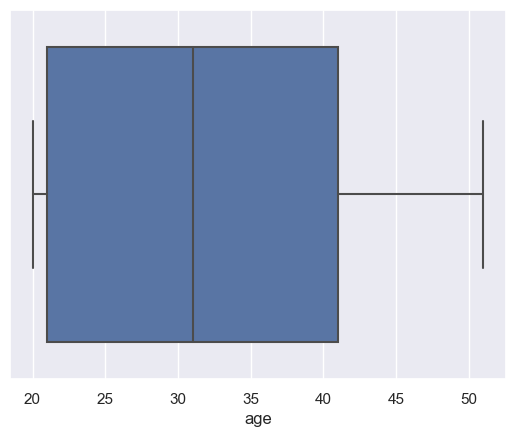

In [19]:
# Checking box plot of age feature
sns.boxplot(x=df['age']);

## to_coupon_GEQ_5min Feature

In [20]:
# Checking values in to_coupon_GEQ_5min feature
df['to_coupon_GEQ_5min'].value_counts()

to_coupon_GEQ_5min
1    12684
Name: count, dtype: int64

In [21]:
# to_coupon_GEQ_5min is has only 1 value. Dropping this feature
df.drop('to_coupon_GEQ_5min', inplace=True, axis=1)

## Temperature Feature

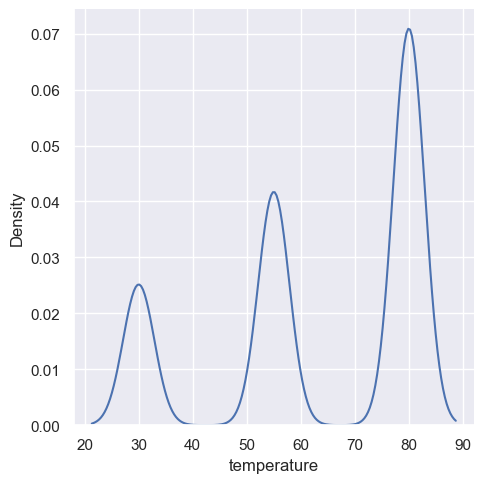

In [22]:
# Checking distribution of temperature feature
sns.displot(x=df['temperature'], kind="kde");

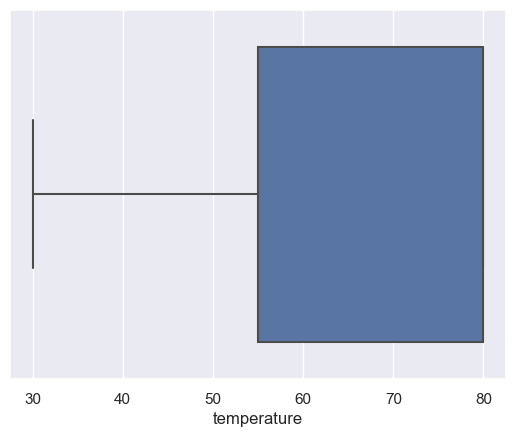

In [23]:
# Checking box plot of temperature feature
sns.boxplot(x=df['temperature']);

## Encoding

In [24]:
def encode(df):
    # label Encoding
    label_columns = ["expiration", "gender", "education", "income", "bar", "coffee_house", 
                     "carry_away", "restaurant_less_than_20", "restaurant_20_to_50"]

    # Expiration
    expiration_map = {"1d":1, "2h":0}
    df['expiration'] = df['expiration'].map(expiration_map)

    # gender
    gender_map = {"Male":1, "Female":0}
    df['gender'] = df['gender'].map(gender_map)

    # education
    education_map = {"Some High School" :0,
                     "High School Graduate":1,
                     "Some college - no degree":2,
                     "Associates degree":3,
                     "Bachelors degree":4,
                     "Graduate degree (Masters or Doctorate)":5,}
    df['education'] = df['education'].map(education_map)

    # income
    income_map = {"Less than $12500":0,
                  "$12500 - $24999":1,
                  "$25000 - $37499":2,
                  "$37500 - $49999":3,
                  "$50000 - $62499":4,
                  "$62500 - $74999":5,
                  "$75000 - $87499":6,
                  "$87500 - $99999":7,
                  "$100000 or More":8,}
    df['income'] = df['income'].map(income_map)

    #bar, coffee_house, carry_away, restaurant_less_than_20, restaurant_20_to_50 has same type of values
    range_map = {"never":0,
              "less1":1,
              "1~3":2,
              "4~8":3,
              "gt8":4,}
    # bar
    df['bar'] = df['bar'].map(range_map)

    # coffee_house
    df['coffee_house'] = df['coffee_house'].map(range_map)

    # carry_away
    df['carry_away'] = df['carry_away'].map(range_map)

    # restaurant_less_than_20
    df['restaurant_less_than_20'] = df['restaurant_less_than_20'].map(range_map)

    # restaurant_20_to_50
    df['restaurant_20_to_50'] = df['restaurant_20_to_50'].map(range_map)

    # One Hot Encoding
    cat_columns = ["destination", "weather", "coupon", "occupation", "passenger", "marital_status"]
    dummy_cols = pd.get_dummies(df[cat_columns], prefix=cat_columns, drop_first=True)
    df = df.join(dummy_cols)
    df.drop(cat_columns, axis=1, inplace=True)
    
    # Removing special characters from column names.
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]
    
    return df

In [25]:
df_model = encode(df)

## Handling Missing Values

In [26]:
# Missing values are present in following features
df_model.isnull().sum().sort_values(ascending=False).head(5)

coffee_house               217
restaurant_20_to_50        189
carry_away                 151
restaurant_less_than_20    130
bar                        107
dtype: int64

In [27]:
# Imputing missing values with KNN imputer. Knn imputer looks for similar examples in dataset and imputes values based on most frequent value
na_columns = ['coffee_house', 'restaurant_20_to_50', 'carry_away', 'restaurant_less_than_20', 'bar']
imputer = KNNImputer()
df_model[na_columns] = imputer.fit_transform(df_model[na_columns])

In [28]:
# Droping duplicates
df.drop_duplicates(inplace=True)

## Spliting the data into train and test

In [29]:
X = df_model.drop('accepted', axis=1)
y = df_model['accepted']

### Over Sampling

In [55]:
y.value_counts()

accepted
1    7210
0    5474
Name: count, dtype: int64

In [30]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [56]:
y_resampled.value_counts()

accepted
1    7210
0    7210
Name: count, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=101)

## Scaling

In [49]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
std_scaler.fit(X_train)
min_max_scaler.fit(X_train);
X_std_scaled_train = std_scaler.transform(X_train)
X_std_scaled_test = std_scaler.transform(X_test)
X_normalized_train = min_max_scaler.transform(X_train)
X_normalized_test = min_max_scaler.transform(X_test)

## Modeling

In [50]:
def create_model(X_train, X_test, y_train, y_test, algorithm):
    """
    Creates machine learning model.

    Args:
      X_train (pandas.DataFrame): Independent Variables for training.
      X_test (pandas.DataFrame): Independent Variables for testing.
      y_train (pandas.DataFrame): Dependent or Target Variable for training.
      y_test (pandas.DataFrame): Dependent or Target Variable for testing.
      algorithm (function): Machine learning algorithm to be used.

    Returns:
      model: Machine learning model after fitting the data.
      
    """
    # Fitting the model
    if algorithm == SVC:
        model = algorithm(probability=True)
        model.fit(X_train, y_train)
    else:
        model = algorithm()
        model.fit(X_train, y_train)
    
    # Predicting target variable
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluation of model 
    # Train Accuracy Score
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Train Accuracy Score of {algorithm.__name__}: {train_accuracy}\n")
    # Test Accuracy Score
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy Score of {algorithm.__name__}: {test_accuracy}\n")
    print("-" * 100)
    print()
    
    # Classification report
    print(f"Classification Report of {algorithm.__name__}: \n {classification_report(y_test, y_pred)}")
    print("-" * 100)
    print()

    # Confusion Matrix
    print(f"Confusion Matrix of {algorithm.__name__}:")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()
    
    # Roc, AUC score
    y_score1 = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name=algorithm.__name__)
    display.plot()
    plt.plot(np.linspace(0,1),np.linspace(0,1), color="red", alpha=0.2)
    plt.show()
    
    # Return accuracy, precision, recall, f1_score, auc
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    return algorithm.__name__, train_accuracy, test_accuracy, precision, recall, f1score, roc_auc

## Creating Models on unscaled data

---------------------------------------------------------------------------------------------------------
                                          LogisticRegression                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of LogisticRegression: 0.6675624133148405

Test Accuracy Score of LogisticRegression: 0.6640083217753121

----------------------------------------------------------------------------------------------------

Classification Report of LogisticRegression: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.66      1439
           1       0.66      0.69      0.67      1445

    accuracy                           0.66      2884
   macro avg       0.66      0.66      0.66      2884
weighted avg       0.66      0.66      0.66      2884

-----------------------------------------------------------------------------

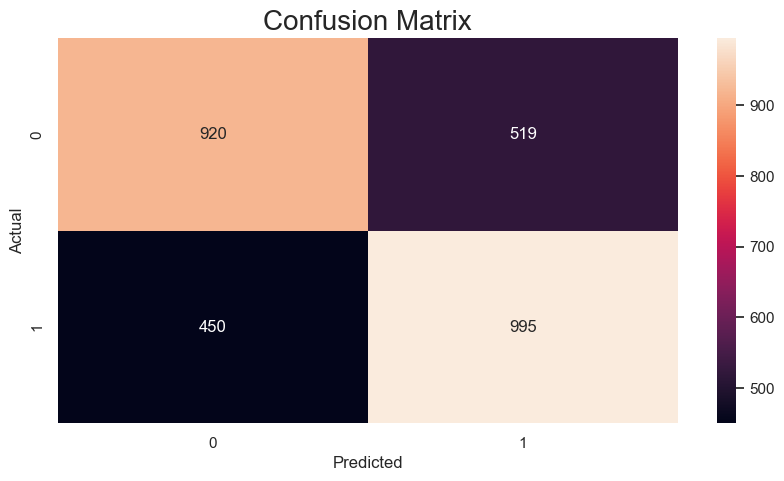

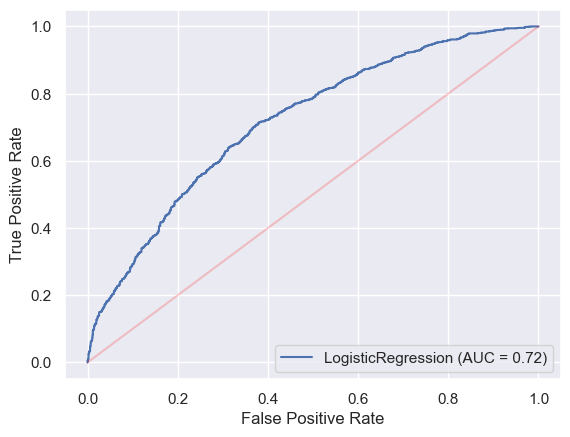

---------------------------------------------------------------------------------------------------------
                                          GaussianNB                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GaussianNB: 0.6268203883495146

Test Accuracy Score of GaussianNB: 0.6203190013869625

----------------------------------------------------------------------------------------------------

Classification Report of GaussianNB: 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      1439
           1       0.61      0.65      0.63      1445

    accuracy                           0.62      2884
   macro avg       0.62      0.62      0.62      2884
weighted avg       0.62      0.62      0.62      2884

----------------------------------------------------------------------------------------------------

Confusi

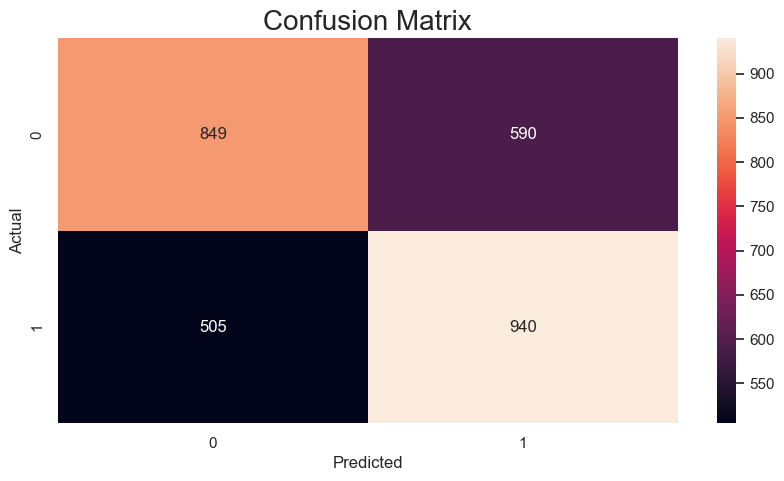

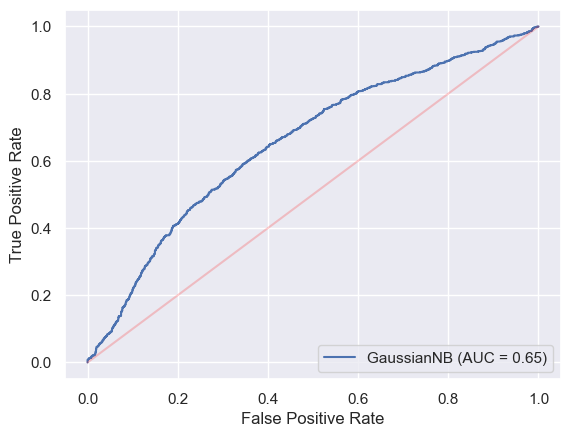

---------------------------------------------------------------------------------------------------------
                                          SVC                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of SVC: 0.6087898751733704

Test Accuracy Score of SVC: 0.6140776699029126

----------------------------------------------------------------------------------------------------

Classification Report of SVC: 
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      1439
           1       0.62      0.60      0.61      1445

    accuracy                           0.61      2884
   macro avg       0.61      0.61      0.61      2884
weighted avg       0.61      0.61      0.61      2884

----------------------------------------------------------------------------------------------------

Confusion Matrix of SVC:


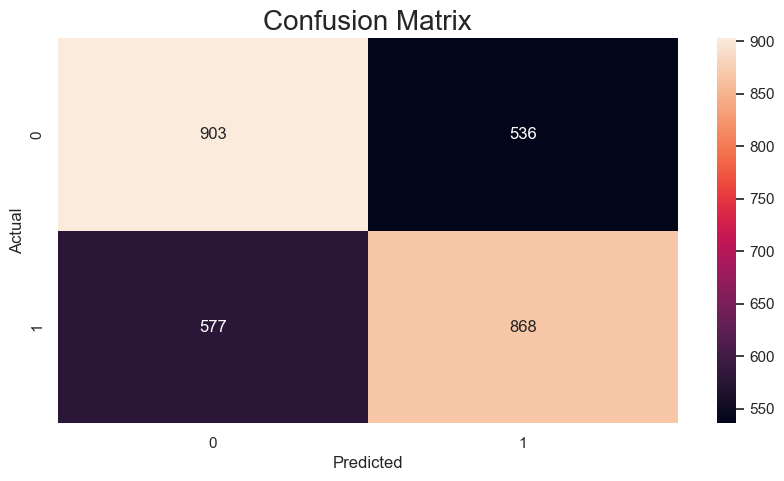

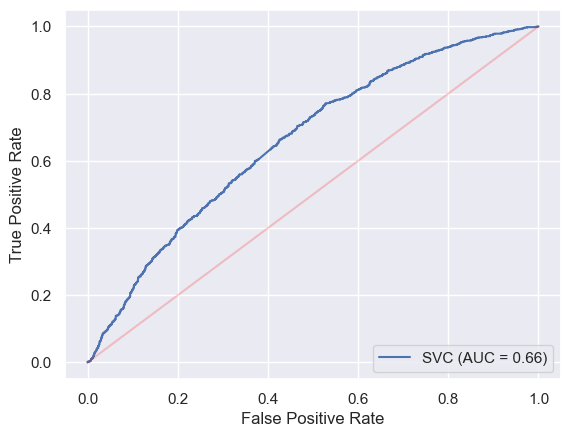

---------------------------------------------------------------------------------------------------------
                                          DecisionTreeClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of DecisionTreeClassifier: 0.9935852981969486

Test Accuracy Score of DecisionTreeClassifier: 0.7087378640776699

----------------------------------------------------------------------------------------------------

Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1439
           1       0.71      0.70      0.71      1445

    accuracy                           0.71      2884
   macro avg       0.71      0.71      0.71      2884
weighted avg       0.71      0.71      0.71      2884

-------------------------------------------------------------

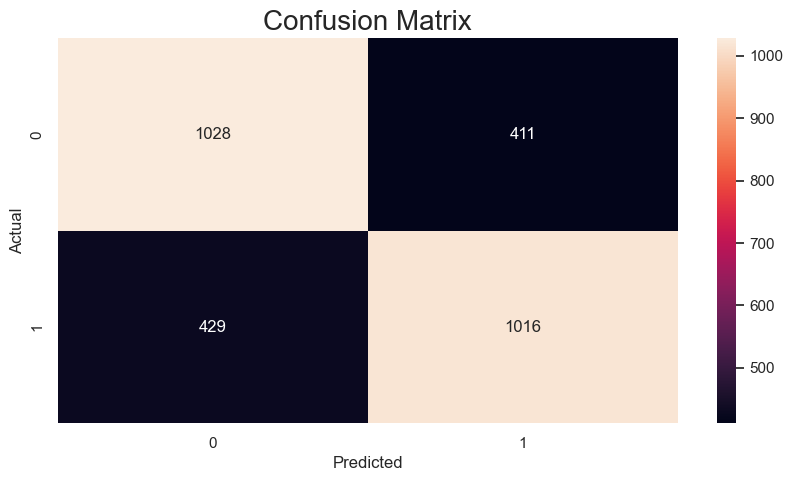

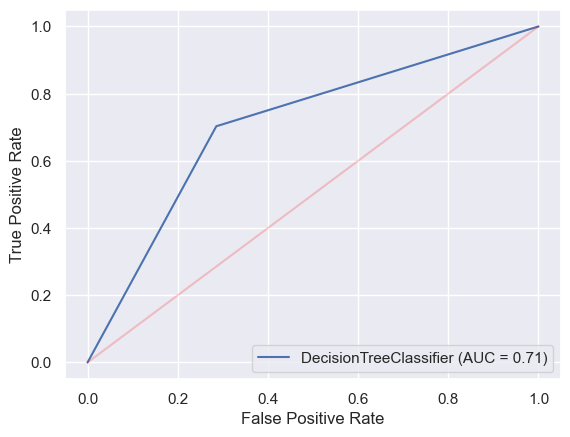

---------------------------------------------------------------------------------------------------------
                                          RandomForestClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of RandomForestClassifier: 0.9935852981969486

Test Accuracy Score of RandomForestClassifier: 0.776005547850208

----------------------------------------------------------------------------------------------------

Classification Report of RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1439
           1       0.77      0.79      0.78      1445

    accuracy                           0.78      2884
   macro avg       0.78      0.78      0.78      2884
weighted avg       0.78      0.78      0.78      2884

--------------------------------------------------------------

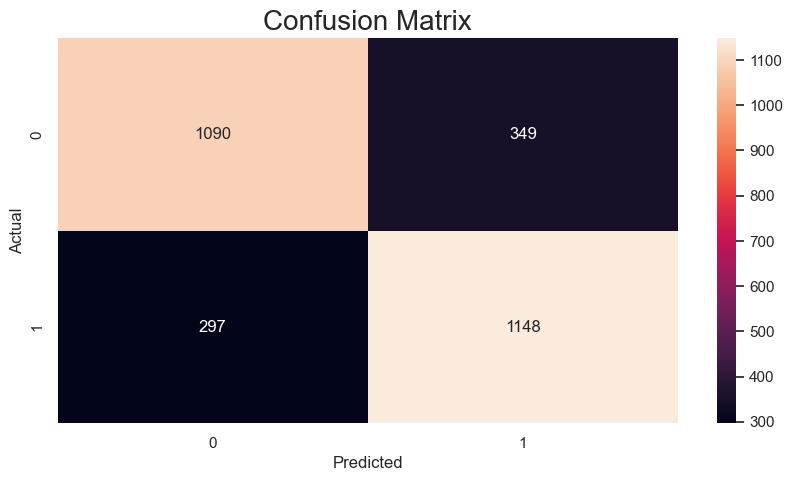

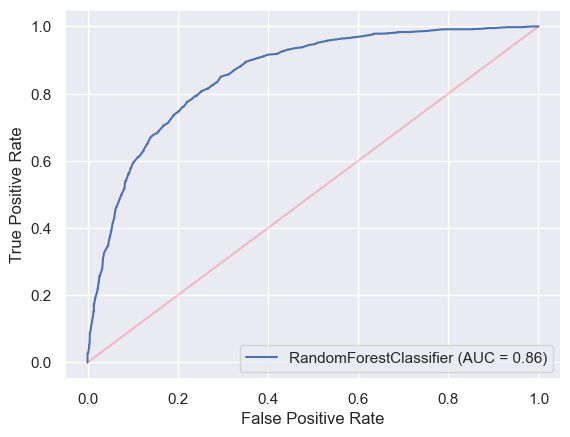

---------------------------------------------------------------------------------------------------------
                                          AdaBoostClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of AdaBoostClassifier: 0.6770110957004161

Test Accuracy Score of AdaBoostClassifier: 0.665742024965326

----------------------------------------------------------------------------------------------------

Classification Report of AdaBoostClassifier: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1439
           1       0.66      0.69      0.67      1445

    accuracy                           0.67      2884
   macro avg       0.67      0.67      0.67      2884
weighted avg       0.67      0.67      0.67      2884

------------------------------------------------------------------------------

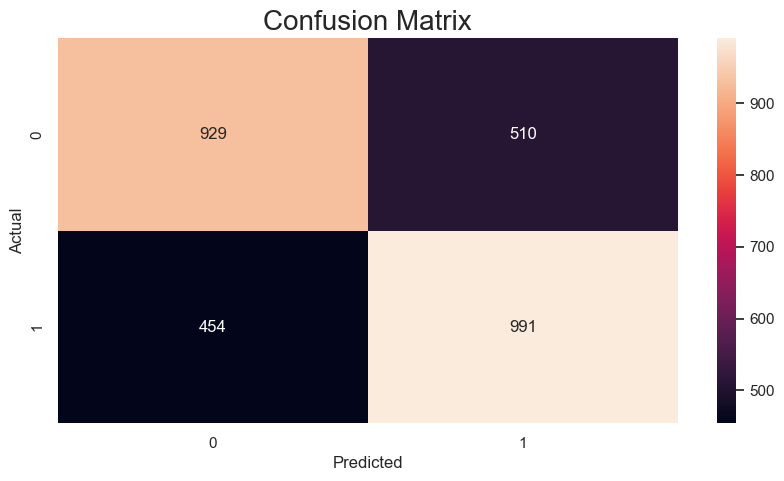

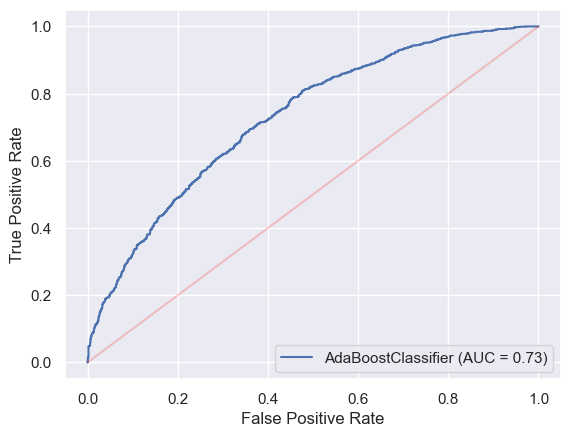

---------------------------------------------------------------------------------------------------------
                                          GradientBoostingClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GradientBoostingClassifier: 0.742371705963939

Test Accuracy Score of GradientBoostingClassifier: 0.7305825242718447

----------------------------------------------------------------------------------------------------

Classification Report of GradientBoostingClassifier: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1439
           1       0.71      0.77      0.74      1445

    accuracy                           0.73      2884
   macro avg       0.73      0.73      0.73      2884
weighted avg       0.73      0.73      0.73      2884

----------------------------------------------

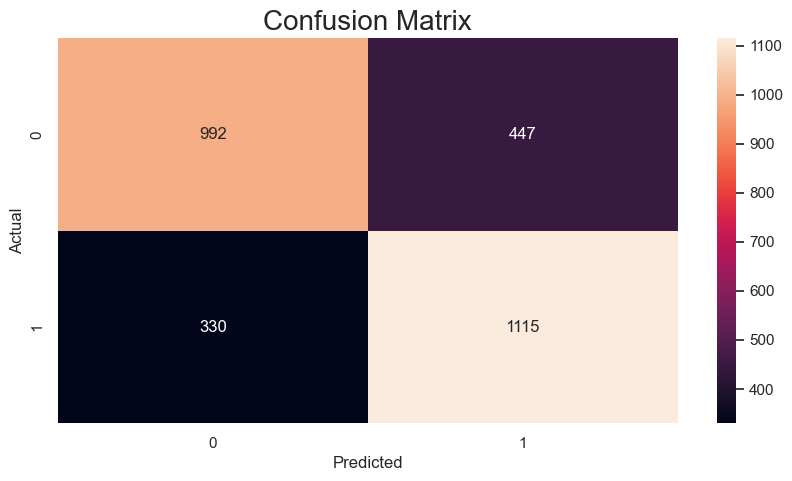

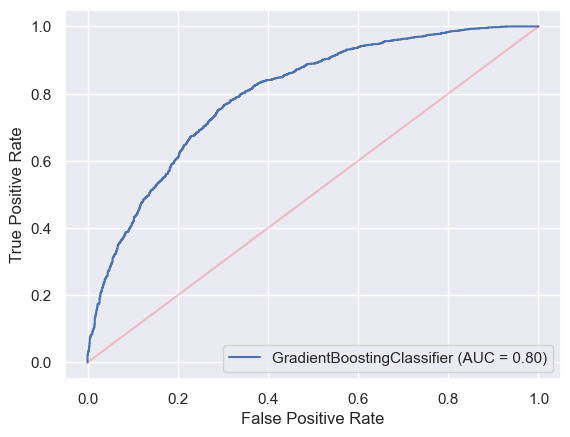

---------------------------------------------------------------------------------------------------------
                                          XGBClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of XGBClassifier: 0.8927704576976422

Test Accuracy Score of XGBClassifier: 0.7857142857142857

----------------------------------------------------------------------------------------------------

Classification Report of XGBClassifier: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1439
           1       0.77      0.81      0.79      1445

    accuracy                           0.79      2884
   macro avg       0.79      0.79      0.79      2884
weighted avg       0.79      0.79      0.79      2884

-------------------------------------------------------------------------------------------------

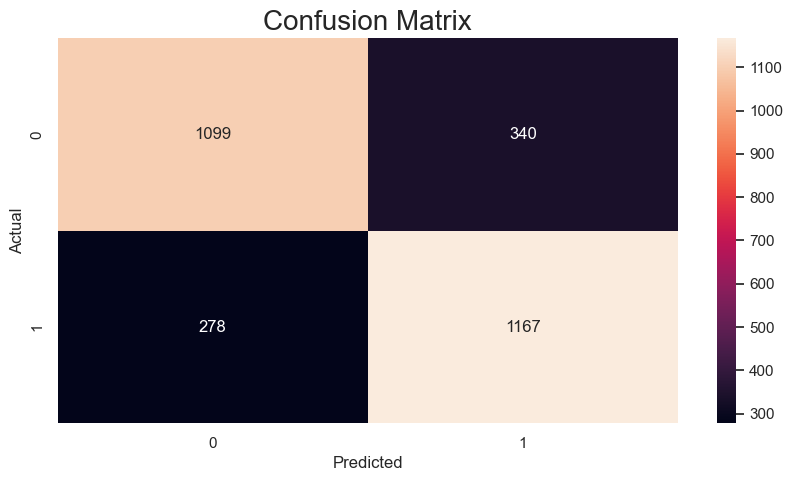

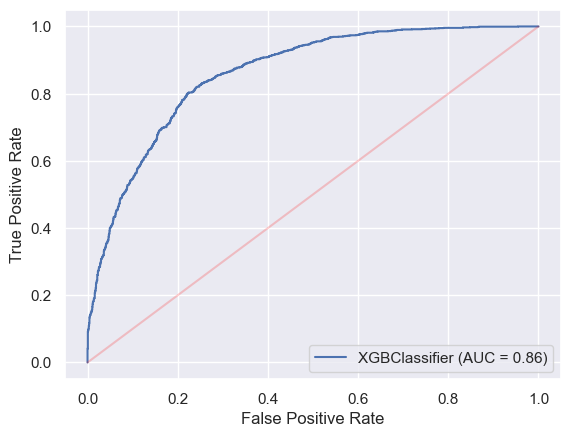

In [34]:
algorithms = [LogisticRegression, GaussianNB, SVC, DecisionTreeClassifier,
              RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]
results_unscaled = []
for algo in algorithms:
    print("---------------------------------------------------------------------------------------------------------")
    print(f"                                          {algo.__name__}                                               ")
    print("---------------------------------------------------------------------------------------------------------")
    results_unscaled.append(create_model(X_train, X_test, y_train, y_test, algo))

In [35]:
results_unscaled = pd.DataFrame(results_unscaled, columns=['Algorithm Name', 'Train Accuracy', 'TestAccuracy',
                                         'Precision', 'Recall', 'F1 Score', 'AUC'])

# Set the 'Algorithm Name' as the index
results_unscaled.set_index('Algorithm Name', inplace=True)
results_unscaled.to_csv(cwd + "/Results./results_unscaled_dataset.csv")
results_unscaled

,Train Accuracy,TestAccuracy,Precision,Recall,F1 Score,AUC
Algorithm Name,,,,,,
LogisticRegression,0.667562,0.664008,0.657199,0.688581,0.672525,0.717641
GaussianNB,0.626820,0.620319,0.614379,0.650519,0.631933,0.654102
SVC,0.608790,0.614078,0.618234,0.600692,0.609337,0.660852
DecisionTreeClassifier,0.993585,0.708738,0.711983,0.703114,0.707521,0.708685
RandomForestClassifier,0.993585,0.776006,0.766867,0.794464,0.780421,0.857115
AdaBoostClassifier,0.677011,0.665742,0.660227,0.685813,0.672777,0.729177
GradientBoostingClassifier,0.742372,0.730583,0.713828,0.771626,0.741603,0.797479
XGBClassifier,0.892770,0.785714,0.774386,0.807612,0.790650,0.860419


## Random Forest and XGBoost Classifiers are performing better but both are Overfitting.<br> We will use hyperparameter tuning and cross validation to avoid overfitting and improve model

# Creating Models with Standarized Dataset

---------------------------------------------------------------------------------------------------------
                                          LogisticRegression                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of LogisticRegression: 0.6834257975034674

Test Accuracy Score of LogisticRegression: 0.6754507628294036

----------------------------------------------------------------------------------------------------

Classification Report of LogisticRegression: 
               precision    recall  f1-score   support

           0       0.69      0.64      0.66      1439
           1       0.66      0.71      0.69      1445

    accuracy                           0.68      2884
   macro avg       0.68      0.68      0.67      2884
weighted avg       0.68      0.68      0.68      2884

-----------------------------------------------------------------------------

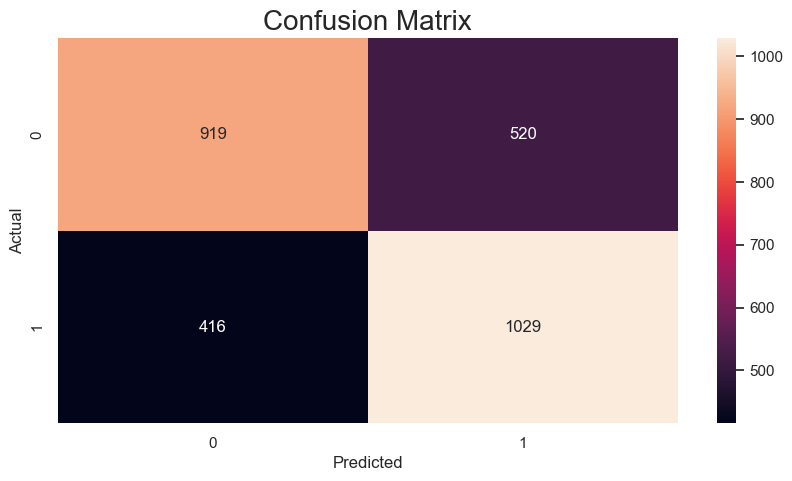

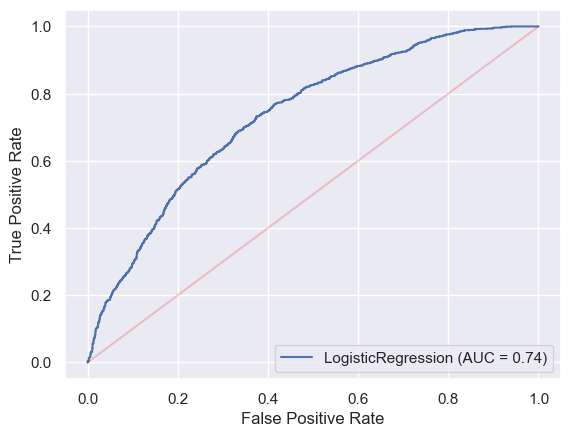

---------------------------------------------------------------------------------------------------------
                                          GaussianNB                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GaussianNB: 0.6268203883495146

Test Accuracy Score of GaussianNB: 0.6203190013869625

----------------------------------------------------------------------------------------------------

Classification Report of GaussianNB: 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      1439
           1       0.61      0.65      0.63      1445

    accuracy                           0.62      2884
   macro avg       0.62      0.62      0.62      2884
weighted avg       0.62      0.62      0.62      2884

----------------------------------------------------------------------------------------------------

Confusi

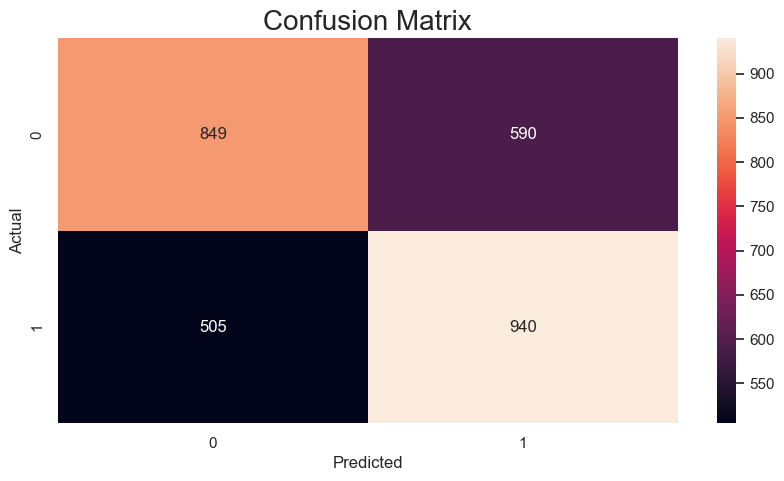

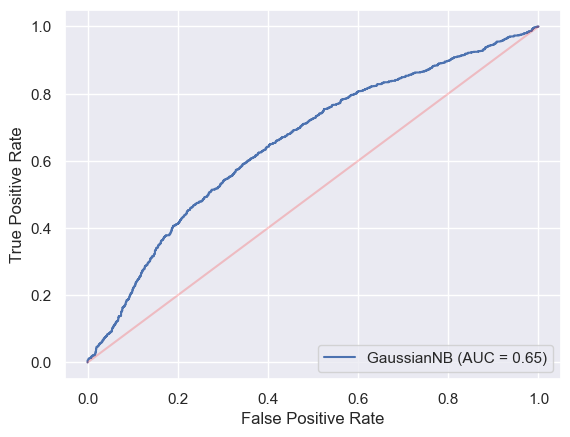

---------------------------------------------------------------------------------------------------------
                                          SVC                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of SVC: 0.8146671289875174

Test Accuracy Score of SVC: 0.7368238557558946

----------------------------------------------------------------------------------------------------

Classification Report of SVC: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1439
           1       0.73      0.76      0.74      1445

    accuracy                           0.74      2884
   macro avg       0.74      0.74      0.74      2884
weighted avg       0.74      0.74      0.74      2884

----------------------------------------------------------------------------------------------------

Confusion Matrix of SVC:


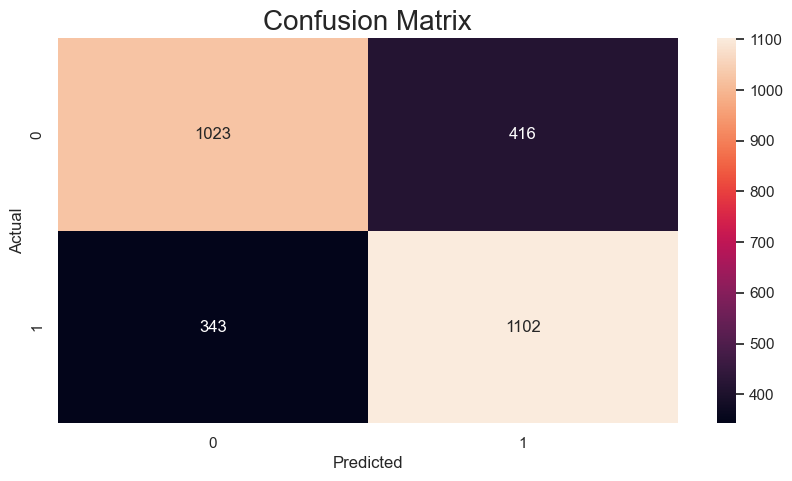

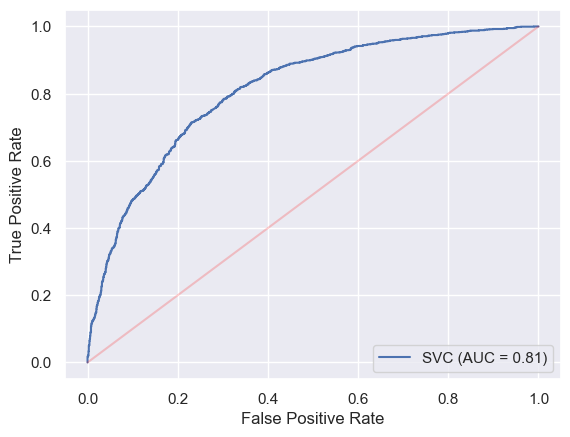

---------------------------------------------------------------------------------------------------------
                                          DecisionTreeClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of DecisionTreeClassifier: 0.9935852981969486

Test Accuracy Score of DecisionTreeClassifier: 0.7108183079056866

----------------------------------------------------------------------------------------------------

Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1439
           1       0.71      0.71      0.71      1445

    accuracy                           0.71      2884
   macro avg       0.71      0.71      0.71      2884
weighted avg       0.71      0.71      0.71      2884

-------------------------------------------------------------

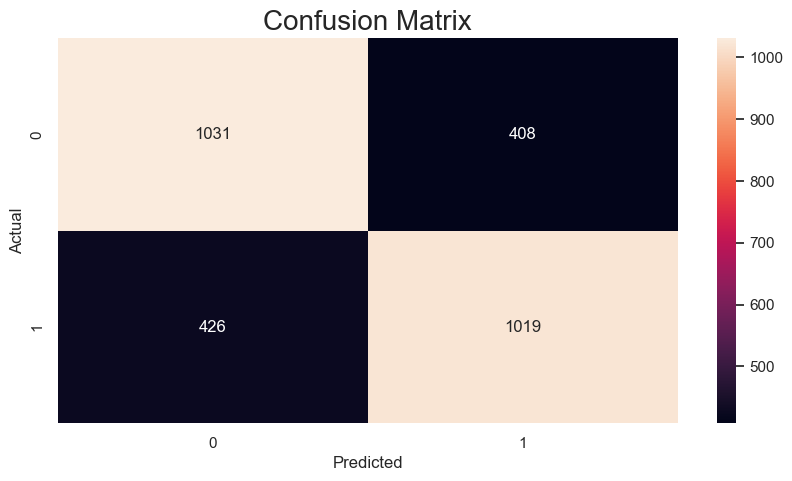

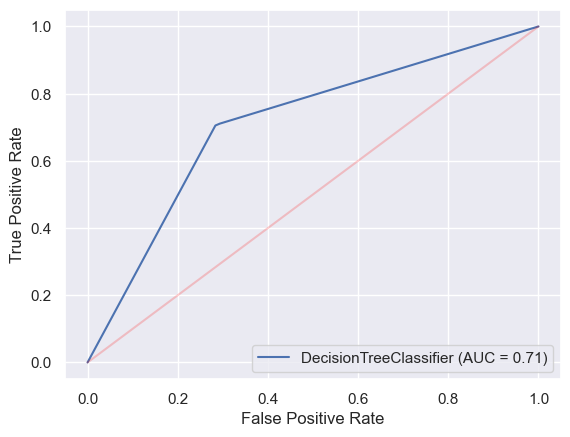

---------------------------------------------------------------------------------------------------------
                                          RandomForestClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of RandomForestClassifier: 0.9935852981969486

Test Accuracy Score of RandomForestClassifier: 0.7787794729542302

----------------------------------------------------------------------------------------------------

Classification Report of RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1439
           1       0.77      0.80      0.78      1445

    accuracy                           0.78      2884
   macro avg       0.78      0.78      0.78      2884
weighted avg       0.78      0.78      0.78      2884

-------------------------------------------------------------

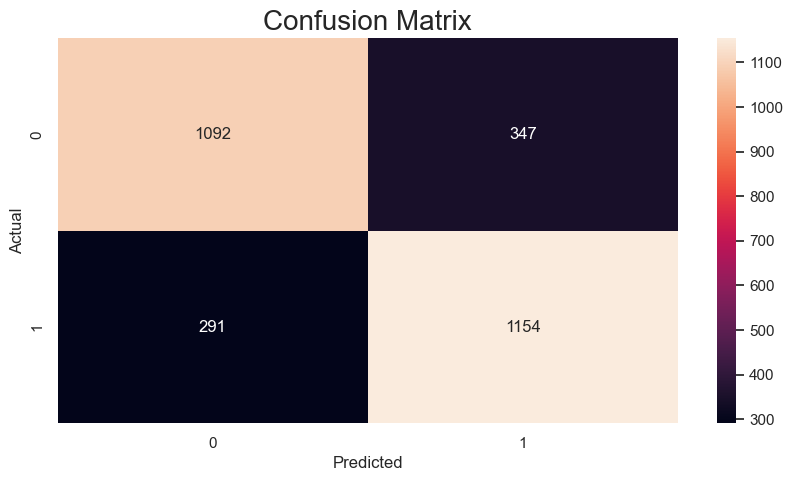

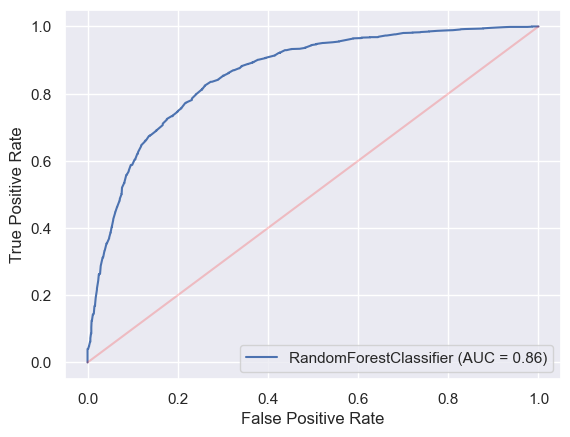

---------------------------------------------------------------------------------------------------------
                                          AdaBoostClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of AdaBoostClassifier: 0.6770110957004161

Test Accuracy Score of AdaBoostClassifier: 0.665742024965326

----------------------------------------------------------------------------------------------------

Classification Report of AdaBoostClassifier: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1439
           1       0.66      0.69      0.67      1445

    accuracy                           0.67      2884
   macro avg       0.67      0.67      0.67      2884
weighted avg       0.67      0.67      0.67      2884

------------------------------------------------------------------------------

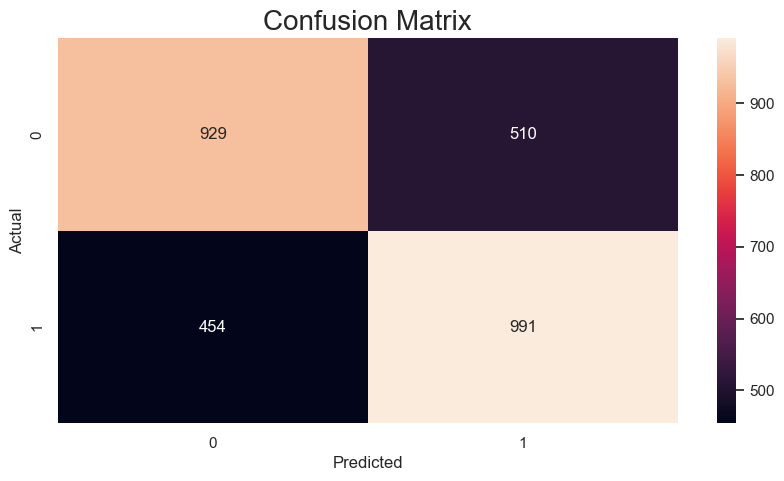

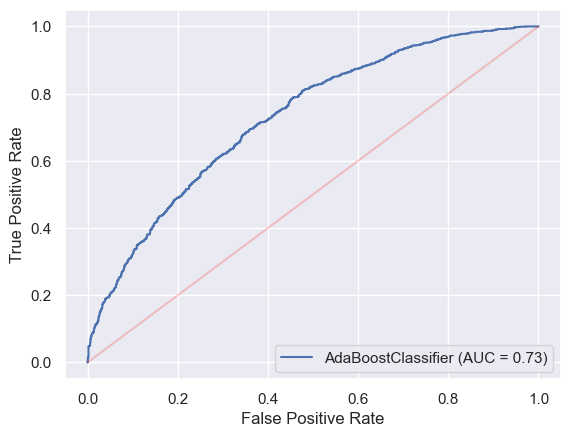

---------------------------------------------------------------------------------------------------------
                                          GradientBoostingClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GradientBoostingClassifier: 0.742371705963939

Test Accuracy Score of GradientBoostingClassifier: 0.7305825242718447

----------------------------------------------------------------------------------------------------

Classification Report of GradientBoostingClassifier: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1439
           1       0.71      0.77      0.74      1445

    accuracy                           0.73      2884
   macro avg       0.73      0.73      0.73      2884
weighted avg       0.73      0.73      0.73      2884

----------------------------------------------

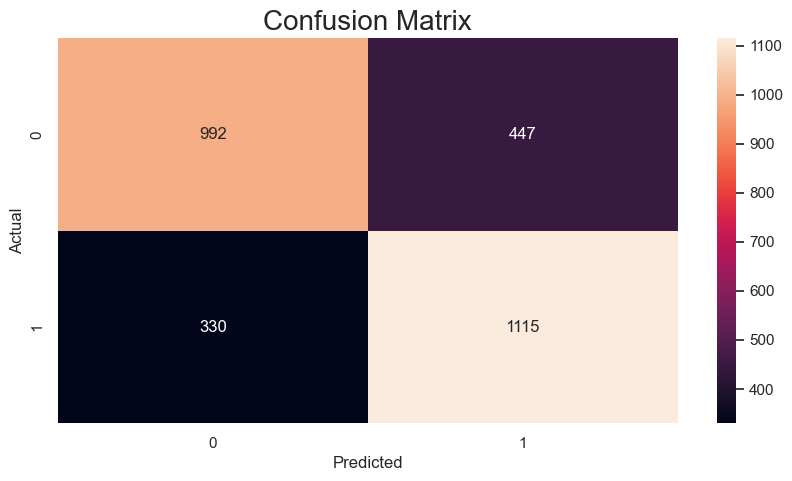

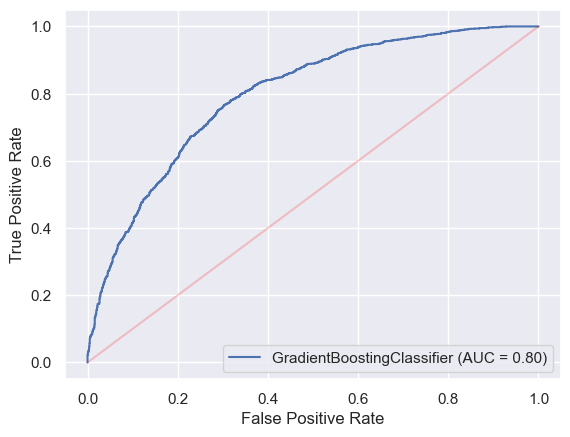

---------------------------------------------------------------------------------------------------------
                                          XGBClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of XGBClassifier: 0.8927704576976422

Test Accuracy Score of XGBClassifier: 0.7857142857142857

----------------------------------------------------------------------------------------------------

Classification Report of XGBClassifier: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1439
           1       0.77      0.81      0.79      1445

    accuracy                           0.79      2884
   macro avg       0.79      0.79      0.79      2884
weighted avg       0.79      0.79      0.79      2884

-------------------------------------------------------------------------------------------------

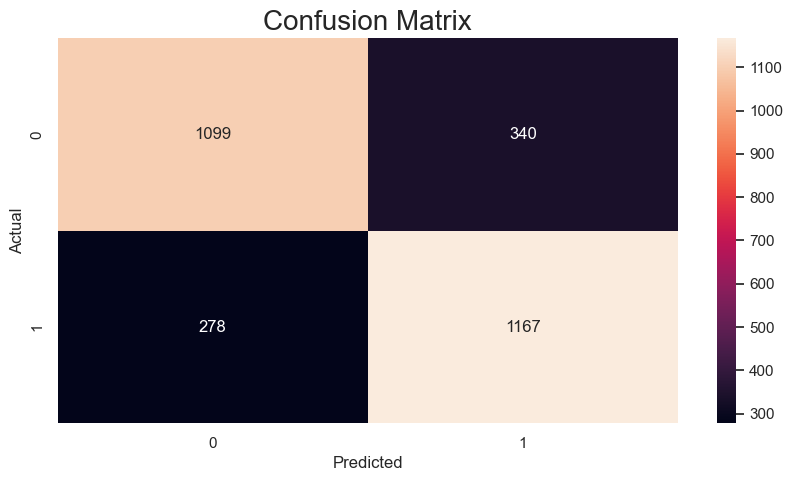

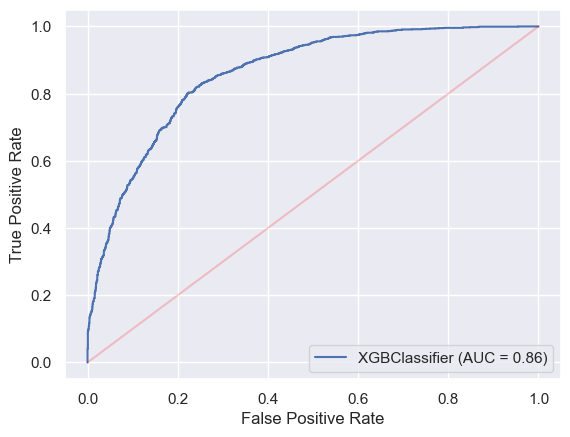

In [36]:
results_standardized_dataset = []
for algo in algorithms:
    print("---------------------------------------------------------------------------------------------------------")
    print(f"                                          {algo.__name__}                                               ")
    print("---------------------------------------------------------------------------------------------------------")
    results_standardized_dataset.append(create_model(X_std_scaled_train, X_std_scaled_test, y_train, y_test, algo))


In [37]:
results_standardized = pd.DataFrame(results_standardized_dataset, columns=['Algorithm Name', 'Train Accuracy', 'TestAccuracy',
                                         'Precision', 'Recall', 'F1 Score', 'AUC'])

# Set the 'Algorithm Name' as the index
results_standardized.set_index('Algorithm Name', inplace=True)
results_standardized.to_csv(cwd + "/Results./results_standardized_dataset.csv")
results_standardized

,Train Accuracy,TestAccuracy,Precision,Recall,F1 Score,AUC
Algorithm Name,,,,,,
LogisticRegression,0.683426,0.675451,0.664300,0.712111,0.687375,0.735332
GaussianNB,0.626820,0.620319,0.614379,0.650519,0.631933,0.654099
SVC,0.814667,0.736824,0.725955,0.762630,0.743841,0.812492
DecisionTreeClassifier,0.993585,0.710818,0.714085,0.705190,0.709610,0.711379
RandomForestClassifier,0.993585,0.778779,0.768821,0.798616,0.783435,0.857088
AdaBoostClassifier,0.677011,0.665742,0.660227,0.685813,0.672777,0.729177
GradientBoostingClassifier,0.742372,0.730583,0.713828,0.771626,0.741603,0.797481
XGBClassifier,0.892770,0.785714,0.774386,0.807612,0.790650,0.860407


# Creating Models with Normalized Dataset

---------------------------------------------------------------------------------------------------------
                                          LogisticRegression                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of LogisticRegression: 0.6822122052704577

Test Accuracy Score of LogisticRegression: 0.6726768377253814

----------------------------------------------------------------------------------------------------

Classification Report of LogisticRegression: 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66      1439
           1       0.66      0.71      0.68      1445

    accuracy                           0.67      2884
   macro avg       0.67      0.67      0.67      2884
weighted avg       0.67      0.67      0.67      2884

-----------------------------------------------------------------------------

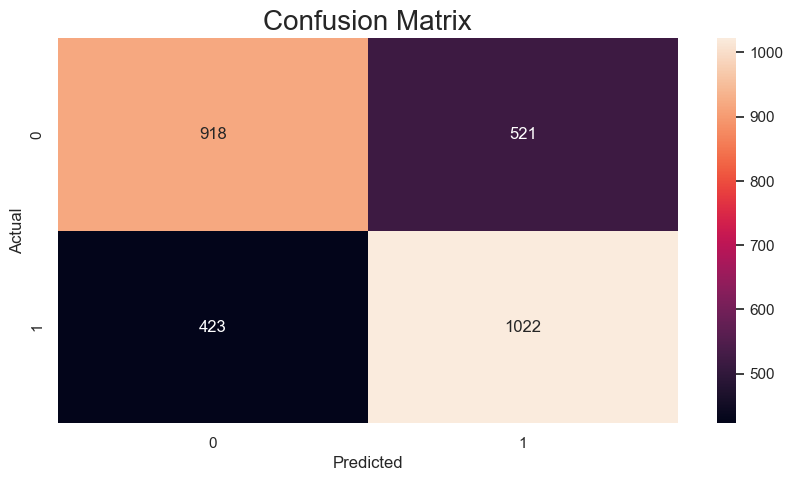

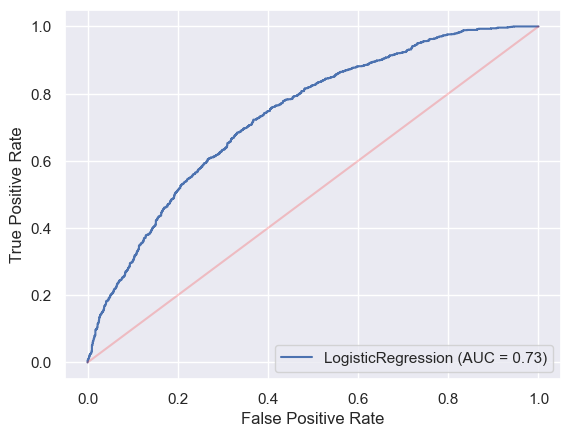

---------------------------------------------------------------------------------------------------------
                                          GaussianNB                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GaussianNB: 0.6268203883495146

Test Accuracy Score of GaussianNB: 0.6203190013869625

----------------------------------------------------------------------------------------------------

Classification Report of GaussianNB: 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      1439
           1       0.61      0.65      0.63      1445

    accuracy                           0.62      2884
   macro avg       0.62      0.62      0.62      2884
weighted avg       0.62      0.62      0.62      2884

----------------------------------------------------------------------------------------------------

Confusi

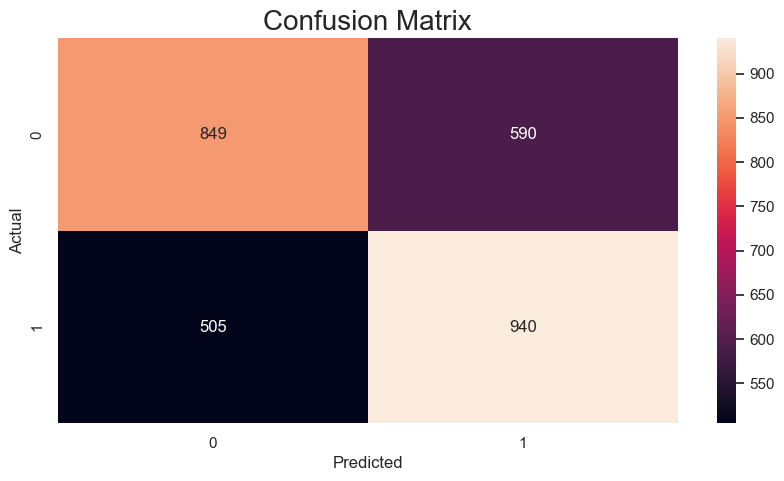

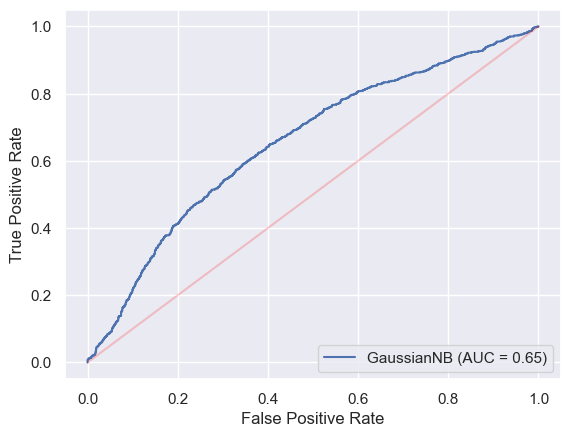

---------------------------------------------------------------------------------------------------------
                                          SVC                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of SVC: 0.7897018030513177

Test Accuracy Score of SVC: 0.7343966712898752

----------------------------------------------------------------------------------------------------

Classification Report of SVC: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1439
           1       0.73      0.75      0.74      1445

    accuracy                           0.73      2884
   macro avg       0.73      0.73      0.73      2884
weighted avg       0.73      0.73      0.73      2884

----------------------------------------------------------------------------------------------------

Confusion Matrix of SVC:


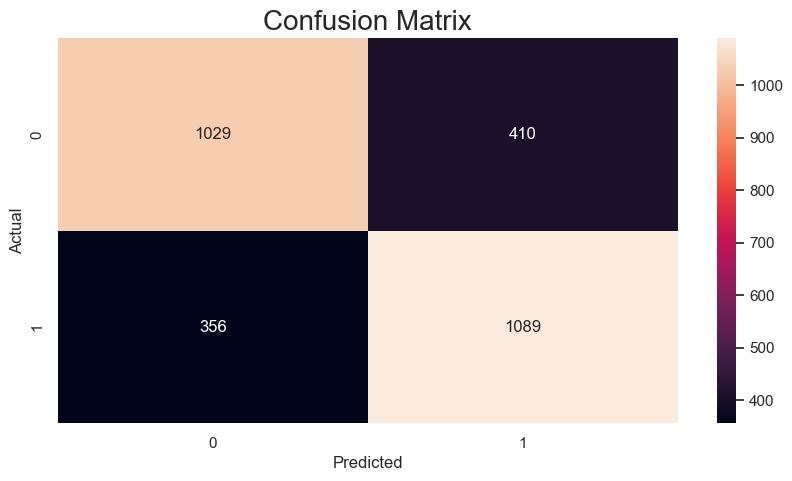

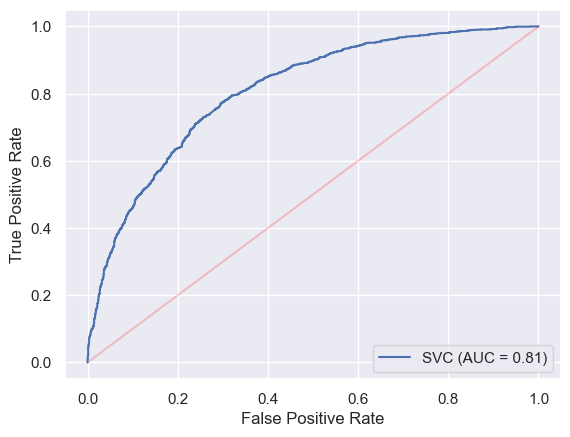

---------------------------------------------------------------------------------------------------------
                                          DecisionTreeClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of DecisionTreeClassifier: 0.9935852981969486

Test Accuracy Score of DecisionTreeClassifier: 0.7115117891816921

----------------------------------------------------------------------------------------------------

Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1439
           1       0.71      0.71      0.71      1445

    accuracy                           0.71      2884
   macro avg       0.71      0.71      0.71      2884
weighted avg       0.71      0.71      0.71      2884

-------------------------------------------------------------

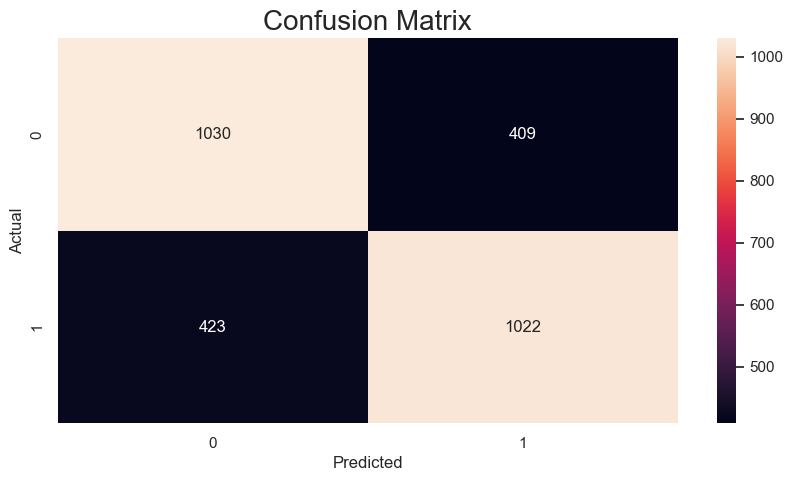

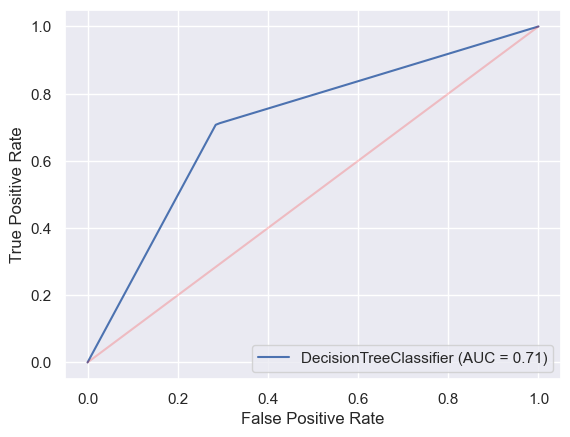

---------------------------------------------------------------------------------------------------------
                                          RandomForestClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of RandomForestClassifier: 0.9935852981969486

Test Accuracy Score of RandomForestClassifier: 0.7780859916782247

----------------------------------------------------------------------------------------------------

Classification Report of RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1439
           1       0.77      0.80      0.78      1445

    accuracy                           0.78      2884
   macro avg       0.78      0.78      0.78      2884
weighted avg       0.78      0.78      0.78      2884

-------------------------------------------------------------

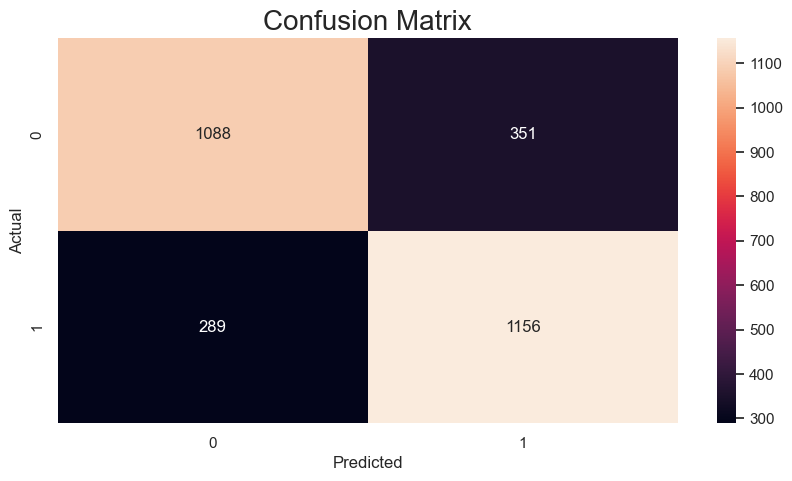

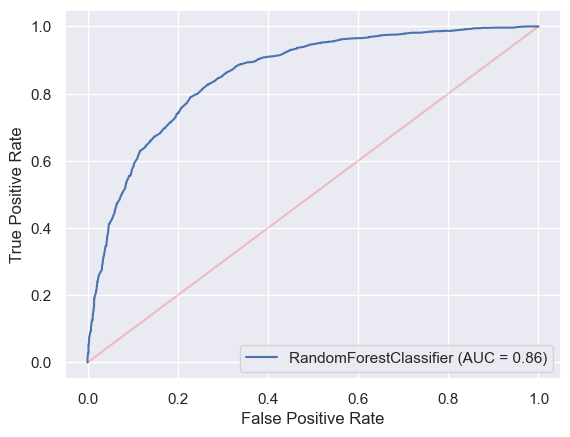

---------------------------------------------------------------------------------------------------------
                                          AdaBoostClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of AdaBoostClassifier: 0.6770110957004161

Test Accuracy Score of AdaBoostClassifier: 0.665742024965326

----------------------------------------------------------------------------------------------------

Classification Report of AdaBoostClassifier: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1439
           1       0.66      0.69      0.67      1445

    accuracy                           0.67      2884
   macro avg       0.67      0.67      0.67      2884
weighted avg       0.67      0.67      0.67      2884

------------------------------------------------------------------------------

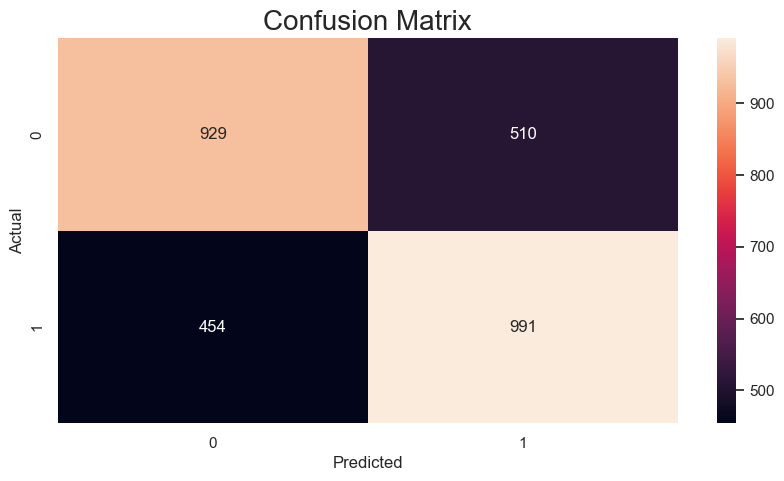

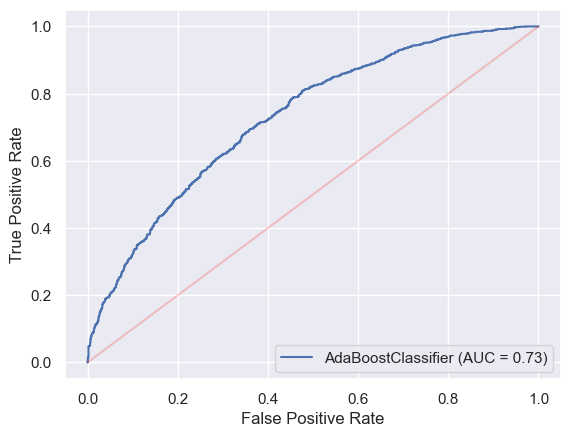

---------------------------------------------------------------------------------------------------------
                                          GradientBoostingClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of GradientBoostingClassifier: 0.742371705963939

Test Accuracy Score of GradientBoostingClassifier: 0.7305825242718447

----------------------------------------------------------------------------------------------------

Classification Report of GradientBoostingClassifier: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1439
           1       0.71      0.77      0.74      1445

    accuracy                           0.73      2884
   macro avg       0.73      0.73      0.73      2884
weighted avg       0.73      0.73      0.73      2884

----------------------------------------------

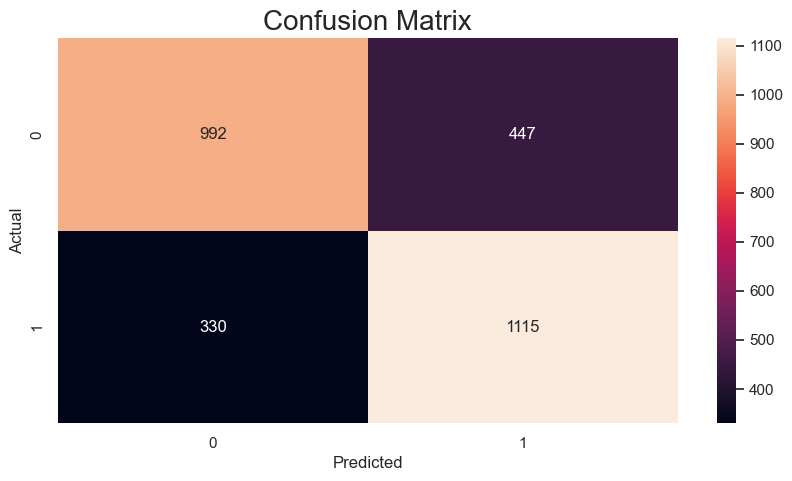

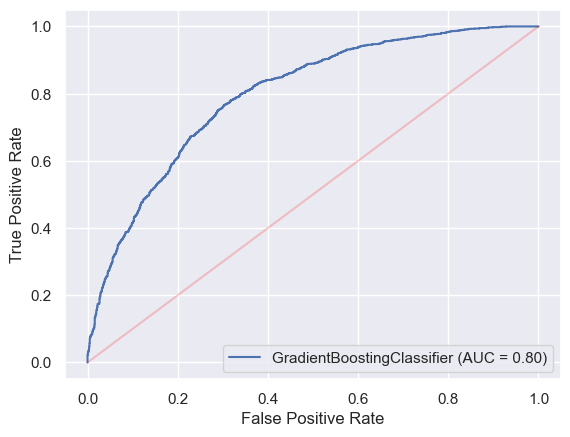

---------------------------------------------------------------------------------------------------------
                                          XGBClassifier                                               
---------------------------------------------------------------------------------------------------------
Train Accuracy Score of XGBClassifier: 0.8927704576976422

Test Accuracy Score of XGBClassifier: 0.7857142857142857

----------------------------------------------------------------------------------------------------

Classification Report of XGBClassifier: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1439
           1       0.77      0.81      0.79      1445

    accuracy                           0.79      2884
   macro avg       0.79      0.79      0.79      2884
weighted avg       0.79      0.79      0.79      2884

-------------------------------------------------------------------------------------------------

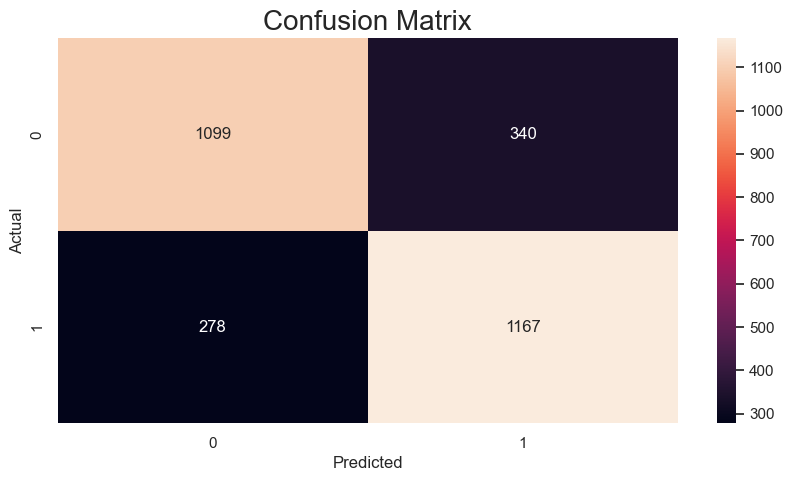

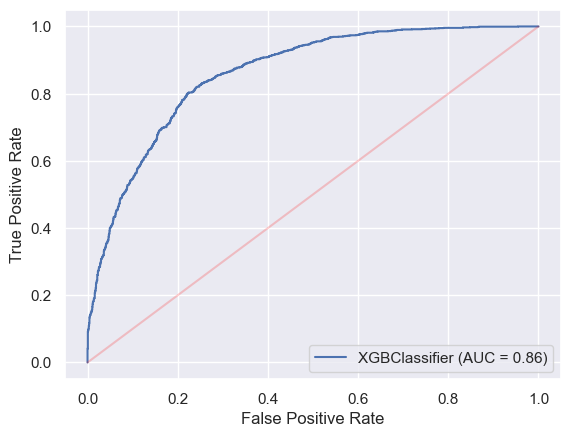

In [38]:
results_normalized_dataset = []
for algo in algorithms:
    print("---------------------------------------------------------------------------------------------------------")
    print(f"                                          {algo.__name__}                                               ")
    print("---------------------------------------------------------------------------------------------------------")
    results_normalized_dataset.append(create_model(X_normalized_train, X_normalized_test, y_train, y_test, algo))


In [39]:
results_normalized = pd.DataFrame(results_normalized_dataset, columns=['Algorithm Name', 'Train Accuracy', 'TestAccuracy',
                                         'Precision', 'Recall', 'F1 Score', 'AUC'])

# Set the 'Algorithm Name' as the index
results_normalized.set_index('Algorithm Name', inplace=True)
results_normalized.to_csv(cwd + "/Results./results_normalized_dataset.csv")
results_normalized

,Train Accuracy,TestAccuracy,Precision,Recall,F1 Score,AUC
Algorithm Name,,,,,,
LogisticRegression,0.682212,0.672677,0.662346,0.707266,0.684070,0.734988
GaussianNB,0.626820,0.620319,0.614379,0.650519,0.631933,0.654102
SVC,0.789702,0.734397,0.726484,0.753633,0.739810,0.809138
DecisionTreeClassifier,0.993585,0.711512,0.714186,0.707266,0.710709,0.711932
RandomForestClassifier,0.993585,0.778086,0.767087,0.800000,0.783198,0.856189
AdaBoostClassifier,0.677011,0.665742,0.660227,0.685813,0.672777,0.729177
GradientBoostingClassifier,0.742372,0.730583,0.713828,0.771626,0.741603,0.797481
XGBClassifier,0.892770,0.785714,0.774386,0.807612,0.790650,0.860419


### Standarizing and Normalizing the data didn't have much impact on Model. There is little improvement in standarized dataset. So choosing standardized dataset going forward

## HyperParameter Tuning

## Random Forest Classifier Hyperparameter Tuning

In [40]:
"""rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9, None],
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 10,scoring='accuracy', verbose=2)
grid_search_rf.fit(X_std_scaled_train, y_train)"""
print()

In [41]:
"""print(grid_search_rf.best_estimator_)
print('rf_best Best Score',grid_search_rf.best_score_)
print('rf_best Best Parmas',grid_search_rf.best_params_)"""
print()

In [42]:
# Output
"""RandomForestClassifier(max_depth=9)
rf_best Best Score 0.7403775998412702
rf_best Best Parmas {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'n_estimators': 100}"""
print()

## XGBClassifier Hyperparameter Tuning

In [43]:
"""xgbr = XGBClassifier()
                     
#GRID SEARCH
params_XGB_best= {'alpha': [1, 5, 10], 
             'learning_rate': [0.05, 0.1, 0.5], 
             'n_estimators': [200, 300, 500],
             'max_depth': [3, 5, 10]}

              

grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=params_XGB_best, cv = 10,scoring='accuracy', verbose=2)
grid_search_xgb.fit(X_std_scaled_train, y_train)"""
print()

In [44]:
"""print(grid_search_xgb.best_estimator_)
print('xgbr_best Best Score',grid_search_xgb.best_score_)
print('xgbr_best Best Parmas',grid_search_xgb.best_params_)"""
print()

In [45]:
# Output
"""XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)
xgbr_best Best Score 0.7947310234322038
xgbr_best Best Parmas {'alpha': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}"""
print()

## Hyperparameter Tuning suggests XGboost is performing better.

# Final Model

### Using best params of XGBOOST and creating final model

In [51]:
params = {'alpha': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
xgb = XGBClassifier(**params)
xgb.fit(X_std_scaled_train, y_train)
y_pred = xgb.predict(X_std_scaled_test)

Accuracy Score: 0.7662593614505321
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1059
           1       0.79      0.81      0.80      1478

    accuracy                           0.77      2537
   macro avg       0.76      0.76      0.76      2537
weighted avg       0.77      0.77      0.77      2537

--------------------------------------------------------------------------------
Confusion Matrix:


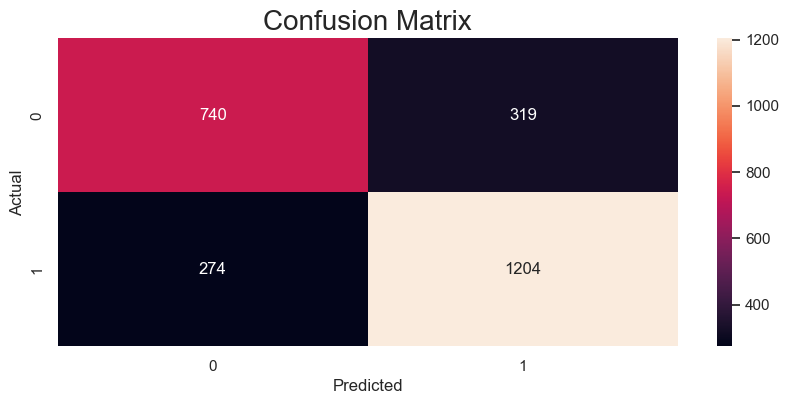

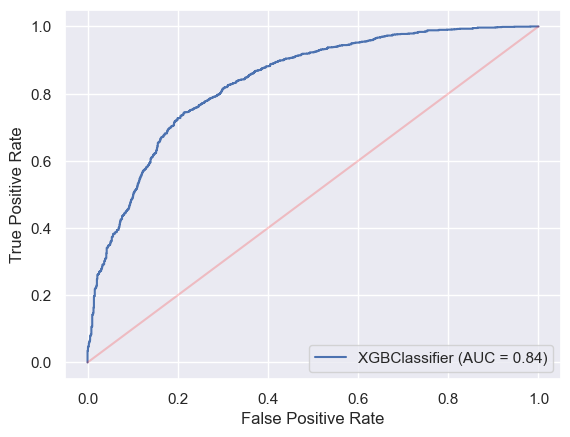

In [52]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print('----'*20)
print(f"Classification Report\n {classification_report(y_test, y_pred)}")
print('----'*20)
print(f"Confusion Matrix:")
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix', fontsize=20) 
plt.show()

# Roc, AUC score
y_score1 = xgb.predict_proba(X_std_scaled_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name="XGBClassifier")
display.plot()
plt.plot(np.linspace(0,1),np.linspace(0,1), color="red", alpha=0.2)
plt.show()
    